In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
CC = pd.read_csv('C:/Users/Jitesh Chandani/Desktop/CC_GENERAL.csv')

In [3]:
CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
CC.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# Missing Values

In [5]:
CC.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# treat missing value

CC['MINIMUM_PAYMENTS'] = CC['MINIMUM_PAYMENTS'].fillna(CC['MINIMUM_PAYMENTS'].median())

CC['CREDIT_LIMIT'] = CC['CREDIT_LIMIT'].fillna(CC['CREDIT_LIMIT'].median())

In [7]:
CC.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
def summ_var(x):
    n = x.count()
    nmiss = x.isnull().sum()
    total = n + nmiss
    percmiss = (nmiss/total) * 100
    return pd.Series([x.count(), x.isnull().sum(), total , round(percmiss,2), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'Total','PercMISS', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [9]:
num_var = [i for i in dict(CC.dtypes) if dict(CC.dtypes)[i] in ['float64','int64']] 
num_summary=CC[num_var].apply(lambda x: summ_var(x)).T
num_summary

,N,NMISS,Total,PercMISS,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,8950.0,0.0,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,8950.0,0.0,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8950.0,0.0,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,8950.0,0.0,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,8950.0,0.0,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8950.0,0.0,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,8950.0,0.0,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,8950.0,0.0,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,8950.0,0.0,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,8950.0,0.0,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


In [10]:
#Outlier Treatment
def Outlier_Capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

CC[num_var] = CC[num_var].apply(Outlier_Capping)

In [11]:
# Derive New KPI's
#1. Monthly_avg_purchase
CC['Monthly_avg_pur'] = CC['PURCHASES']/CC['TENURE']


#2.  Monthly_cash_adv_amt
CC['Monthly_cash_adv_amt'] = CC['CASH_ADVANCE']/CC['TENURE']


#3.  Purchase_Type
CC['Purchase_type'] = np.where((CC['ONEOFF_PURCHASES']==0) & (CC['INSTALLMENTS_PURCHASES']==0), 'none', 
                      np.where((CC['ONEOFF_PURCHASES'] > 0) & (CC['INSTALLMENTS_PURCHASES'] == 0), 'only_oneoff',
                      np.where((CC['ONEOFF_PURCHASES']== 0) & (CC['INSTALLMENTS_PURCHASES'] >0),'only_purchase','both')))


#4.  Limit_usage

CC['Limit_usage'] = CC['BALANCE'] / CC['CREDIT_LIMIT']



#5.  Payment to minimum payment ration

CC['Pay_ratio'] = CC['PAYMENTS'] / CC['MINIMUM_PAYMENTS']

In [12]:
CC['Purchase_type'].unique()


array(['only_purchase', 'none', 'only_oneoff', 'both'], dtype=object)

In [13]:
CC.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_pur,Monthly_cash_adv_amt,Purchase_type,Limit_usage,Pay_ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,only_purchase,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,only_oneoff,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,only_oneoff,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,only_oneoff,0.681429,2.771075


In [14]:
# get dummies
CC_dumm = pd.get_dummies(CC,columns=['Purchase_type'], drop_first= True, prefix='Dumm_')
CC_dumm

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_pur,Monthly_cash_adv_amt,Limit_usage,Pay_ratio,Dumm__none,Dumm__only_oneoff,Dumm__only_purchase
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,0,0,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,1,0,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,1,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,312.343947,0.000000,12,124.916667,17.149001,0.222223,0.000000,0,1,0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,48.886365,0.500000,6,48.520000,0.000000,0.028494,6.660231,0,0,1
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,312.343947,0.000000,6,50.000000,0.000000,0.019183,0.883197,0,0,1
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,82.418369,0.250000,6,24.066667,0.000000,0.023399,0.986076,0,0,1
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,55.755628,0.250000,6,0.000000,6.093130,0.026915,0.942505,1,0,0


In [15]:
CC_dumm = CC_dumm.drop('CUST_ID', axis=1)

# Standardizing the Data

In [16]:
# scale


from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()

model_std = sc.fit(CC_dumm)
CC_std = model_std.transform(CC_dumm)

In [17]:
CC_std = pd.DataFrame(CC_std, columns=CC_dumm.columns)

In [18]:
CC_std

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_pur,Monthly_cash_adv_amt,Limit_usage,Pay_ratio,Dumm__none,Dumm__only_oneoff,Dumm__only_purchase
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,...,-0.493151,-0.525551,0.360680,-0.559583,-0.510509,-0.979687,-0.273174,-0.543690,-0.514625,1.720516
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,...,0.263600,0.234227,0.360680,-0.620854,2.704783,0.205564,-0.113670,1.839282,-0.514625,-0.581221
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,...,-0.097448,-0.525551,0.360680,-0.124282,-0.510509,-0.149529,-0.303659,-0.543690,1.943162,-0.581221
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,...,-0.352941,-0.525551,0.360680,0.341886,-0.407813,-0.463809,-0.370128,-0.543690,1.943162,-0.581221
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,...,-0.407742,-0.525551,0.360680,-0.610578,-0.510509,0.842675,-0.184394,-0.543690,1.943162,-0.581221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.769165,0.520970,-0.422995,-0.489121,-0.138086,-0.527079,1.269843,-0.678661,1.179833,-0.685371,...,-0.566668,1.183951,-4.122768,-0.246907,-0.510509,-1.014987,0.076281,-0.543690,-0.514625,1.720516
8946,-0.773899,0.520970,-0.417172,-0.489121,-0.124954,-0.527079,1.269843,-0.678661,1.179833,-0.685371,...,-0.352941,-0.525551,-4.122768,-0.235501,-0.510509,-1.041476,-0.310930,-0.543690,-0.514625,1.720516
8947,-0.771756,-0.191225,-0.519198,-0.489121,-0.355053,-0.527079,0.854576,-0.678661,0.760469,-0.685371,...,-0.539466,0.329200,-4.122768,-0.435371,-0.510509,-1.029482,-0.304035,-0.543690,-0.514625,1.720516
8948,-0.776811,-0.191225,-0.613881,-0.489121,-0.568588,-0.506490,-1.221758,-0.678661,-0.916995,0.166976,...,-0.561096,0.329200,-4.122768,-0.620854,-0.474021,-1.019478,-0.306955,1.839282,-0.514625,-0.581221


In [19]:
CC_std.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_pur,Monthly_cash_adv_amt,Limit_usage,Pay_ratio,Dumm__none,Dumm__only_oneoff,Dumm__only_purchase
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,...,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.936213e-16,7.329544e-15,-1.813117e-15,-7.236223e-15,5.149698e-16,-4.225348e-15,-3.716084e-16,2.021052e-15,2.353921e-16,-6.862791e-16,...,6.670021e-17,-2.199184e-15,1.556446e-14,-2.869412e-15,1.695230e-16,-8.565774e-17,-2.805949e-17,-4.507133e-16,-2.274580e-15,8.733374e-15
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,...,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.836213e-01,-3.363725e+00,-6.138806e-01,-4.891213e-01,-5.685883e-01,-5.270790e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.853706e-01,...,-5.900690e-01,-5.255510e-01,-4.122768e+00,-6.208537e-01,-5.105093e-01,-1.096033e+00,-3.701277e-01,-5.436904e-01,-5.146250e-01,-5.812208e-01
25%,-7.184204e-01,4.617444e-02,-5.878921e-01,-4.891213e-01,-5.685883e-01,-5.270790e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.853706e-01,...,-4.677200e-01,-5.255510e-01,3.606795e-01,-5.946545e-01,-5.105093e-01,-9.781238e-01,-3.089145e-01,-5.436904e-01,-5.146250e-01,-5.812208e-01
50%,-3.395198e-01,5.209700e-01,-3.769912e-01,-4.544767e-01,-4.369770e-01,-5.270790e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.853706e-01,...,-3.529405e-01,-5.255510e-01,3.606795e-01,-3.747161e-01,-5.105093e-01,-2.368735e-01,-2.346413e-01,-5.436904e-01,-5.146250e-01,-5.812208e-01
75%,2.609187e-01,5.209700e-01,1.140258e-01,3.729876e-02,1.244232e-01,1.001874e-01,1.062211e+00,3.269728e-01,9.701506e-01,4.510881e-01,...,3.350995e-02,-3.712234e-02,3.606795e-01,1.284903e-01,8.286120e-02,9.189450e-01,3.290940e-02,-5.436904e-01,-5.146250e-01,1.720516e+00
max,3.965323e+00,5.209700e-01,5.272481e+00,5.610058e+00,5.178305e+00,4.872650e+00,1.269843e+00,2.673451e+00,1.599199e+00,3.576352e+00,...,6.391999e+00,2.893453e+00,3.606795e-01,1.034055e+01,9.059258e+00,4.689673e+00,4.514437e+01,1.839282e+00,1.943162e+00,1.720516e+00


In [20]:
# Feature Selection
from sklearn.decomposition import PCA

pca_model = PCA(n_components=24)

pca_model = pca_model.fit(CC_std)

In [21]:
pca_model.explained_variance_

array([6.22701708e+00, 4.86144338e+00, 2.27418953e+00, 1.94268799e+00,
       1.26406761e+00, 1.16975401e+00, 9.73667342e-01, 8.52916131e-01,
       7.24695009e-01, 6.78853365e-01, 5.41762862e-01, 5.02986031e-01,
       4.73901802e-01, 3.20106747e-01, 2.98934266e-01, 2.32921958e-01,
       2.03762031e-01, 1.48158102e-01, 1.30667530e-01, 1.03431773e-01,
       3.43472015e-02, 1.93159389e-02, 1.81524601e-02, 4.94172006e-03])

In [22]:
#Cumulative Variance explains
Cum_var=np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=4)*100)
Cum_var

array([25.94, 46.19, 55.66, 63.75, 69.02, 73.89, 77.95, 81.5 , 84.52,
       87.35, 89.61, 91.71, 93.68, 95.01, 96.26, 97.23, 98.08, 98.7 ,
       99.24, 99.67, 99.81, 99.89, 99.97, 99.99])

In [23]:
pd.DataFrame({'Eigen_value': pca_model.explained_variance_, 'Cumm_variance':Cum_var}, index=range(1,25)).round(4).head(8)

,Eigen_value,Cumm_variance
1,6.2270,25.94
2,4.8614,46.19
3,2.2742,55.66
4,1.9427,63.75
5,1.2641,69.02
6,1.1698,73.89
7,0.9737,77.95
8,0.8529,81.50


variance should be more than 75% and eigen value >0.8. Therefore we take 7 components

In [24]:
pca_model = PCA(n_components=7)

pca_model = pca_model.fit(CC_std)

In [25]:
pca_model.explained_variance_

array([6.22701708, 4.86144338, 2.27418953, 1.94268799, 1.26406755,
       1.169754  , 0.97366712])

In [26]:
reduced = pca_model.transform(CC_std)
dimensions = pd.DataFrame(reduced)
dimensions.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7']

In [27]:
dimensions.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.167984,-2.420020,-0.447757,0.159047,0.143823,0.535712,0.175760
1,-2.779296,3.190469,0.110932,1.799311,0.756207,0.628267,-0.378006
2,0.970701,-0.204694,1.940185,-1.974427,-1.855042,0.714128,-0.826997
3,-0.431579,-0.523349,2.356060,-0.806894,-0.574762,1.273672,0.732135
4,-1.587918,-1.203934,1.270807,-1.835101,-0.501647,0.316517,-0.168159


In [28]:
Loadings =  pd.DataFrame((pca_model.components_.T * np.sqrt(pca_model.explained_variance_)).T,columns=CC_std.columns).T

In [29]:
Loadings.to_csv('Loadings.csv')

In [30]:
selected_var = ['PURCHASES',
'Monthly_avg_pur',
'BALANCE',
'CASH_ADVANCE',
'PURCHASES_INSTALLMENTS_FREQUENCY',
'Dumm__only_oneoff',
'Limit_usage',
'Dumm__none',
'TENURE'
]

In [31]:
final_input_seg = CC_std[selected_var]

In [32]:
from sklearn.cluster import KMeans

In [33]:
km_3 = KMeans(n_clusters=3, random_state=123).fit(final_input_seg)
km_4 = KMeans(n_clusters=4, random_state=123).fit(final_input_seg)
km_5 = KMeans(n_clusters=5, random_state=123).fit(final_input_seg)
km_6 = KMeans(n_clusters=6, random_state=123).fit(final_input_seg)
km_7 = KMeans(n_clusters=7, random_state=123).fit(final_input_seg)
km_8 = KMeans(n_clusters=8, random_state=123).fit(final_input_seg)

In [34]:
CC_dumm['cluster_3'] = km_3.labels_
CC_dumm['cluster_4'] = km_4.labels_
CC_dumm['cluster_5'] = km_5.labels_
CC_dumm['cluster_6'] = km_6.labels_
CC_dumm['cluster_7'] = km_7.labels_
CC_dumm['cluster_8'] = km_8.labels_

In [35]:
CC_dumm.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,Pay_ratio,Dumm__none,Dumm__only_oneoff,Dumm__only_purchase,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1.446508,0,0,1,1,2,0,1,1,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,3.826241,1,0,0,0,3,1,4,0,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.991682,0,1,0,2,0,2,3,5,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,0,1,0,2,0,2,3,5,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,2.771075,0,1,0,2,0,2,3,5,0


In [36]:
# Calculate SC for k=3 to k=10
from sklearn.metrics import silhouette_score
from sklearn import metrics

k_range = range(3, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(CC_std)
    scores.append(metrics.silhouette_score(final_input_seg, km.labels_))

In [37]:
scores

[0.24457048722723543,
 0.21567478768001438,
 0.319211429453239,
 0.21291232539196206,
 0.25213335300688905,
 0.2359792784773722,
 0.18220075305349884]

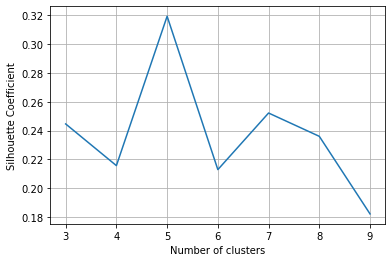

In [38]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

# Based on SC scores , the best is 5-segment solution


In [39]:
size=pd.concat([pd.Series(CC_dumm.cluster_3.size), pd.Series.sort_index(CC_dumm.cluster_3.value_counts()), pd.Series.sort_index(CC_dumm.cluster_4.value_counts()),
           pd.Series.sort_index(CC_dumm.cluster_5.value_counts()), pd.Series.sort_index(CC_dumm.cluster_6.value_counts()),
           pd.Series.sort_index(CC_dumm.cluster_7.value_counts()), pd.Series.sort_index(CC_dumm.cluster_8.value_counts())])

In [40]:
size

0    8950
0    2211
1    4871
2    1868
0    1821
1     646
2    4253
3    2230
0    4136
1     742
2    1697
3     601
4    1774
0     560
1    3871
2    1585
3    1572
4     722
5     640
0     556
1    2756
2     609
3    1599
4     537
5    1592
6    1301
0    1590
1    1599
2    2351
3    1169
4     280
5     602
6     558
7     801
dtype: int64

In [41]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/CC_dumm.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950,2211,4871,1868,1821,646,4253,2230,4136,742,...,1592,1301,1590,1599,2351,1169,280,602,558,801


In [42]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([CC_dumm.apply(lambda x: x.mean()).T, CC_dumm.groupby('cluster_3').apply(lambda x: x.mean()).T, CC_dumm.groupby('cluster_4').apply(lambda x: x.mean()).T,
          CC_dumm.groupby('cluster_5').apply(lambda x: x.mean()).T, CC_dumm.groupby('cluster_6').apply(lambda x: x.mean()).T,
          CC_dumm.groupby('cluster_7').apply(lambda x: x.mean()).T, CC_dumm.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

In [43]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE,1541.046707,2376.572108,1207.796711,1421.086357,1365.322110,3121.761673,907.941596,2434.073011,785.956024,5759.158550,...,1125.117287,2393.196764,1132.529755,1689.546811,270.378289,2384.484143,3943.094591,778.440773,5862.873245,1276.863848
BALANCE_FREQUENCY,0.878083,0.889895,0.888637,0.836584,0.833752,0.981491,0.874608,0.890955,0.871380,0.975909,...,0.830892,0.991947,0.831080,0.892777,0.804620,0.992842,0.981700,0.775662,0.968799,0.967751
PURCHASES,936.229237,37.279783,1422.775330,731.524325,613.857699,5362.768344,865.962137,51.180036,862.768808,583.697466,...,629.413844,965.331230,624.171371,0.000000,612.533679,800.007186,7218.946500,375.106346,522.913280,3086.940649
ONEOFF_PURCHASES,536.493774,15.324713,701.662396,722.665314,613.928347,3367.105554,342.468608,23.312368,341.801734,318.756186,...,629.494655,419.203405,624.252283,0.000000,196.239732,313.502618,4654.436493,210.236296,316.096703,1716.638639
INSTALLMENTS_PURCHASES,384.498368,21.985351,696.499853,0.000000,0.000000,1781.330550,523.938164,27.897691,521.424287,265.030486,...,0.000000,546.434804,0.000000,0.000000,416.779974,486.846210,2090.088171,165.368389,206.935198,1363.347262
CASH_ADVANCE,935.920972,2145.528307,421.500190,845.611451,820.186459,911.335139,327.116963,2198.646734,246.998026,5081.235410,...,488.094524,732.584064,488.708479,1301.148382,108.797538,721.600233,745.473384,1023.934910,5972.627936,326.727241
PURCHASES_FREQUENCY,0.490351,0.034104,0.762765,0.320025,0.312032,0.927486,0.735204,0.042353,0.733532,0.351607,...,0.315045,0.731439,0.314760,0.000208,0.695808,0.715544,0.917446,0.429023,0.289424,0.922427
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.009683,0.244960,0.319802,0.311803,0.669455,0.184002,0.013083,0.183858,0.148569,...,0.314784,0.209545,0.314498,0.000000,0.130432,0.178926,0.713989,0.123883,0.137851,0.555204
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.025038,0.658254,0.000000,0.000000,0.757045,0.635253,0.031808,0.633646,0.250814,...,0.000000,0.630851,0.000000,0.000208,0.607199,0.618660,0.731568,0.290770,0.190994,0.779260
CASH_ADVANCE_FREQUENCY,0.134017,0.283651,0.069768,0.124441,0.124465,0.100663,0.062966,0.286985,0.054391,0.438383,...,0.096227,0.139534,0.096348,0.238683,0.023260,0.141758,0.081746,0.194619,0.467605,0.053968


In [44]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [45]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,2211.000000,4871.000000,1868.000000,1821.000000,646.000000,4253.000000,2230.000000,4136.000000,742.000000,...,1592.000000,1301.000000,1590.000000,1599.000000,2351.000000,1169.000000,280.000000,602.000000,558.000000,801.000000
Seg_Pct,1.000000,0.247039,0.544246,0.208715,0.203464,0.072179,0.475196,0.249162,0.462123,0.082905,...,0.177877,0.145363,0.177654,0.178659,0.262682,0.130615,0.031285,0.067263,0.062346,0.089497
BALANCE,1541.046707,2376.572108,1207.796711,1421.086357,1365.322110,3121.761673,907.941596,2434.073011,785.956024,5759.158550,...,1125.117287,2393.196764,1132.529755,1689.546811,270.378289,2384.484143,3943.094591,778.440773,5862.873245,1276.863848
BALANCE_FREQUENCY,0.878083,0.889895,0.888637,0.836584,0.833752,0.981491,0.874608,0.890955,0.871380,0.975909,...,0.830892,0.991947,0.831080,0.892777,0.804620,0.992842,0.981700,0.775662,0.968799,0.967751
PURCHASES,936.229237,37.279783,1422.775330,731.524325,613.857699,5362.768344,865.962137,51.180036,862.768808,583.697466,...,629.413844,965.331230,624.171371,0.000000,612.533679,800.007186,7218.946500,375.106346,522.913280,3086.940649
ONEOFF_PURCHASES,536.493774,15.324713,701.662396,722.665314,613.928347,3367.105554,342.468608,23.312368,341.801734,318.756186,...,629.494655,419.203405,624.252283,0.000000,196.239732,313.502618,4654.436493,210.236296,316.096703,1716.638639
INSTALLMENTS_PURCHASES,384.498368,21.985351,696.499853,0.000000,0.000000,1781.330550,523.938164,27.897691,521.424287,265.030486,...,0.000000,546.434804,0.000000,0.000000,416.779974,486.846210,2090.088171,165.368389,206.935198,1363.347262
CASH_ADVANCE,935.920972,2145.528307,421.500190,845.611451,820.186459,911.335139,327.116963,2198.646734,246.998026,5081.235410,...,488.094524,732.584064,488.708479,1301.148382,108.797538,721.600233,745.473384,1023.934910,5972.627936,326.727241
PURCHASES_FREQUENCY,0.490351,0.034104,0.762765,0.320025,0.312032,0.927486,0.735204,0.042353,0.733532,0.351607,...,0.315045,0.731439,0.314760,0.000208,0.695808,0.715544,0.917446,0.429023,0.289424,0.922427
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.009683,0.244960,0.319802,0.311803,0.669455,0.184002,0.013083,0.183858,0.148569,...,0.314784,0.209545,0.314498,0.000000,0.130432,0.178926,0.713989,0.123883,0.137851,0.555204


In [46]:
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [47]:
Profling_output_final.to_csv('Profiling_output.csv')

In [48]:
# Insights and recommended strategies
#Insights

#Cluster 1 :  The Chances of default are low in this cluster as they don’t borrow more than their limit(CA is low).
#  Also, almost NIL inactive accounts (Dumm_none% is nil and Purchases is at par with overall Purchases)
#  And most Purchases are Installment based (Only_oneOff is nil) , i.e continuity of customer relation with bank.

#Cluster 2 : Balance is high as compared to overall.
#  Cash Advance is also high, i.e, this cluster of card holder might be taking money more than their limit.
#  Limit usage is also exceeded.
#  The percentage of people using neither one_off or installment purchases are high.

#Cluster 3: 
#  Balance is comparatively low.
#  They use one_off purchases a lot.
#  Their monthly average is low

#Cluster 4: Chances to default is very high.
#  Balance and Purchases are extremely high.
#  Use of any type of purchase is low.

#Cluster 5: 
#  Average Balance is on par with Overall Balance
#  Not using any type of purchases.
#  Cash advance taken above overall average

In [49]:
#Strategies : 
#Cluster 1 :These cluster of cardholders are reliable and therefore need to be retained for longer time.
#  They can be given option to get customized services

#Cluster2 : Since this group have a high cash advance amout, they can be given alerts/warnings when exceeding limits
# They can also be given offers on Installment purchases, which could help in maintaing longer relation with the bank.

#Cluster 3: Since their one_off purchases are too high, they probably should be given offers on installment purchases.
#  Loyalty Programms/ points on installement purchases can be introduced to this cluster 

#Cluster 4: Default customers in this cluster is very high, so timely alerts/warning should be given and pursued.
#  Offers on one_off and installment purchases should be given to them.

#Cluster 5: Both one_off and installment purchases are not used, so offers on both these type of purchases should be given to this cluster
#  Purchases is very low, this could indicate a lot of inactive accounts. Therefore bank must pursue them by giving offers.
#  Bank can also get feedback of why these cardholders are not active.